<a href="https://colab.research.google.com/github/Charlotte-geller/BIA/blob/master/Copie_de_assignment2_regression_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: Regression and Classification

- Due: May 13 @ 23.59
- Deliverables: You should submit this notebook in Moodle AND answer the questions in the relevant Quiz in Moodle (your grade depends on the quiz).
- Please make sure you fill out the quiz carefully. If you have the correct response on the notebook but not in the quiz you will lose some points. 

The assignment is about regression over two different datasets (2 parts), then a classification for the third part. Each part is independent, you can proceed to complete the different tasks (**please respect the different indications from the statement and the following hints!!!**). Then you should be able to answer the different questions.

In [3]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Data processing import
import numpy as np
import pandas as pd

#Set displayed options 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Visualisation import
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Sklearn import
from sklearn.preprocessing import MinMaxScaler # Normalization
from sklearn.linear_model import LinearRegression # Regression linear model
from sklearn.model_selection import train_test_split # Splitting the data set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Metrics for errors
from sklearn.model_selection import KFold # Cross validation

#Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 1: Credit prediction

The first part focuses on a credit dataset and contains anonymous credit and banking information. First, we give you the loading and the preprocessing steps before proceeding with the regression.

In [4]:
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Credit.csv"
credits = pd.read_csv(url)
display(credits.head())
# Observations and columns (dimensions)
print("Number of observations", credits.shape[0])
print("Number of dimensions", credits.shape[1])
#Drop unnamed: 0 columns because useless
credits.drop("Unnamed: 0", axis= 1)

#Encode the Gender, Student and Married columns to integers for regression
credits.replace(to_replace=['Female', ' Male'], value=[0, 1], inplace=True)
credits.replace(to_replace=['No', 'Yes'], value=[0, 1], inplace=True)
display(credits.head())

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Number of observations 400
Number of dimensions 12


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331


### One feature prediction without normalization

**Task 1.1:**  
From the credits dataset use a linear regression model to predict the `Rating` target from each of these 3 features separately: `Income`, `Limit` and `Age`. 

**Hint:** 
- Do not normalize the data
- Split your dataset into two sets: the training set (80%) and the test set(20%), set the **shuffle parameter to true** and the **random state to 3**
- Create your linear model by fitting also an intercept over the training dataset (set the fit_intercept parameter to `True`). Don't change any other parameters to the model.
- Use the R^2 score, the MAE and the MSE on your test set to compare your 3 models (you should display these values)


In [5]:
#Your code here: Rating prediction from Income.
# print MAE, MSE, R^2 for the test set
X = credits[['Income']] 
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
print("R^2 (With Income features): ", round(model.score(X_test, y_test)))
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE (With Income features): ", mae)
print("MSE (With Income features): ", mse)

R^2 (With Income features):  1.0
MAE (With Income features):  77.32790991423158
MSE (With Income features):  8390.016637814077


In [6]:
#Your code here: Rating prediction from Limit
# print MAE, MSE, R^2
X = credits[['Limit']] 
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
print("R^2 (With Limit features): ", round(model.score(X_test, y_test)))
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE (With Limit features): ", mae)
print("MSE (With Limit features): ", mse)

R^2 (With Limit features):  1.0
MAE (With Limit features):  9.447931255756936
MSE (With Limit features):  130.82877317067613


In [7]:
#Your code here: Rating prediction from Age
# print MAE, MSE, R^2
X = credits[['Age']] 
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
print("R^2 (With Age features): ", abs(round(model.score(X_test, y_test))))
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE (With Age features): ", mae)
print("MSE (With Age features): ", mse)

R^2 (With Age features):  0.0
MAE (With Age features):  112.61574279441166
MSE (With Age features):  19766.23597158794


In [55]:
X = credits[['Age']] 
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
print("R^2 (With Age features): ", abs(round(model.score(X_test, y_test))))
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("MAE (With Age features): ", mae)
print("MSE (With Age features): ", mse)



R^2 (With Age features):  0.0
MAE (With Age features):  112.61574279441166
MSE (With Age features):  19766.23597158794


**Question 1 :**  
What is the MAE of the "Age" model (rounded to the closest integer, eg 60) ?

In [8]:
#Your code here
113

113

**Question 2 :**  
What is the MSE of the "Limit" model (rounded to the closest integer) ?

In [9]:
#Your code here
131

131

**Question 3 :**  
Which feature best predicts the Rating target output ?

In [10]:
#Your code here
"Limit"

'Limit'

### Several features encoding without normalization

From the credits dataset, we want to predict the `Age` from some particular features: `Education`, `Student` and `Married`.

**Task 1.2:**
With a linear regression model, reuse the procedure from the previous task (applied to 3 features as inputs) to regress the `Age`.

**Hint:** 
- Do not normalize the data
- Split your dataset into two sets: the training (80%) and the test set(20%), set the shuffle parameter to true and the random state to 3
- Create your linear model by fitting the intercept  weight over the training dataset (set the parameter to `True`)
- Use the R^2 score, the MAE and the MSE to compare your 3 models (you should display these values)


In [11]:
#Your code here: Age prediction from Education Student and Married
# print MAE, MSE, R^2 for the test set.
X = credits[['Education', 'Student', 'Married']] 
y = credits[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = abs(r2_score(y_test, predictions))

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.04
MAE 14.22
MSE 278.49


In [54]:
X = credits[['Education', 'Student', 'Married']] 
y = credits[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = abs(r2_score(y_test, predictions))

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.04
MAE 14.22
MSE 278.49


**Question 4:**  
What is the MAE of your model (rounded to the nearest integer, eg 60) ?

In [12]:
#Your code here:
14


14

**Question 5:**  
Predict the resulting value when putting the 5th row of the *original* data as input (ie on the 5 row of the all data that you have loaded, after selecting the 3 features and before the train/test split). Hint: This should correspond to a datapoint with values of (16,0,1) for the (Education, Student, Married) features. What predicted value for the age you get (rounded to the closest integer) ?

**Hint:**
- Use the `predict()` function of your model on the 5th row
- To access this value you can use `iloc` (see definition of `iloc` to make sure you select the proper row) 

In [13]:
#Your code here:
loc = credits[['Education', 'Student', 'Married']].iloc[4].values
pred = model.predict([loc])
pred

array([[54.31204088]])

**Question 6:**  
After rounding your prediction to the closest integer value, compute the absolute error from the true age value. What value do you get ?

In [14]:
#Your code here:
error = np.around(pred)-credits[['Age']].iloc[4].values
error

array([[-14.]])

**Task 1.3:**  
Now redo the task 1.2 but this time with a normalization (`MinMaxScaler`sklearn module). Keep the same indications present in the hint. 

**Hints:**
- with the scaler fit and transform X_train then transform X_test

In [15]:
#Your code here: Age prediction from Education Student and Married with normalization
X = credits[['Education', 'Student', 'Married']] 
y = credits[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = abs(r2_score(y_test, predictions))

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.07
MAE 14.46
MSE 286.35


In [53]:
X = credits[['Education', 'Student', 'Married']] 
y = credits[['Age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = abs(r2_score(y_test, predictions))

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.04
MAE 14.22
MSE 278.49


**Question 7:**  
What is the new value of the coefficient related to the `Student` feature (rounding to one decimal place, e.g: 1.1) ?


In [16]:
#Your code here:
a = model.coef_
a_list = [num for elem in a for num in elem]
round(a_list[1],1)

-2.5

### One hot encoding over ethnicity with normalization

**Task 1.4:**  
From the `credits` dataset, do 1-hot encoding on the column `Ethnicity` using the function `get_dummies()` from pandas. We are interested in the influence of ethnicity to predict the rating. 
Compare two models:
- for the first one try to predict `Rating` from: `Education`, `Student` and `Married`
- for the second one try to predict `Rating` from: `Student`, `Married`, `Education` and all the `Etchnicity` encoded columns generated by `get_dummies()`

For both, apply normalization using the `MinMaxScaler`sklearn module.

**Hint:**
- Split your dataset into two sets: the training set (80%) and the test set(20%), set the **shuffle parameter to true** and the **random state to 3**
- Create your linear model by fitting also the intercept over the training dataset (set the parameter to `True`)
- Use the R^2 score, the MAE and the MSE on your test set to compare your 3 models (you should display these values)


In [17]:
#Your code here: One hot encoding on ethnicity
credits_encoded = pd.get_dummies(credits.Ethnicity)
credits = pd.concat([credits, credits_encoded], axis=1)
credits.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,African American,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,1,0,1,Caucasian,333,0,0,1
1,2,106.025,6645,483,3,82,15,0,1,1,Asian,903,0,1,0
2,3,104.593,7075,514,4,71,11,1,0,0,Asian,580,0,1,0
3,4,148.924,9504,681,3,36,11,0,0,0,Asian,964,0,1,0
4,5,55.882,4897,357,2,68,16,1,0,1,Caucasian,331,0,0,1


In [46]:
#Your code here: Rating prediction from Education Student and Married
# print MAE, MSE, R^2 of the test set
X = credits[['Education', 'Student', 'Married']] 
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 -0.03
MAE 110.54
MSE 20218.57


In [47]:
#Your code here: Rating prediction from Education Student Married and Ethnicity encoding columns
# print MAE, MSE, R^2 of the test set
X = credits[['Education', 'Student', 'Married', 'African American',	'Asian',	'Caucasian']]
y = credits[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 -0.07
MAE 113.68
MSE 20956.03


**Question 8:**  
What is the value of the MSE for the first model (rounded to the closest integer, eg 10000)?


In [20]:
#Your code here:
round(118.98)

119

**Question 9:**   
Is adding the ethnicity helping to better predict the rating?


In [21]:
#Your code here:
"yes"

'yes'

## Part 2: Wage prediction 

This part of this assignment will focus on the compensation CEO dataset. For this part, apply normalization each time (`MinMaxScaler` sklearn module).

In [22]:
url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/Wage.csv"
wages = pd.read_csv(url)
wages.drop(['sex', 'region'], axis=1, inplace=True)
display(wages.head())

# Observations and columns (dimensions)
print("Number of observations", wages.shape[0])
print("Number of dimensions", wages.shape[1])
columns_one_hot_encoding = ['race', 'maritl', 'education' ]
columns_bin_encoding = ['jobclass', 'health', 'health_ins']

wages.replace(to_replace=['2. No', '1. Yes', '1. Industrial', '2. Information', '1. <=Good', '2. >=Very Good' ], value=[0, 1, 0, 1, 0, 1], inplace=True)
wages.replace(to_replace=['1. Never Married', '2. Married', '4. Divorced', '3. Widowed', '5. Separated'], value=['Never Married', 'Married', 'Divorced', 'Widowed', 'Separated'], inplace=True)
wages.replace(to_replace=['1. White', '3. Asian', '4. Other', '2. Black'], value=['White', 'Asian', 'Other', 'Black'], inplace=True)
wages.replace(to_replace=['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad','5. Advanced Degree'], value=['< HS Grad', 'College Grad', 'Some College', 'HS Grad','Advanced Degree'], inplace=True)

display(wages.head())

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Information,1. <=Good,1. Yes,4.318063,75.043154


Number of observations 3000
Number of dimensions 10


,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage
0,2006,18,Never Married,White,< HS Grad,0,0,0,4.318063,75.043154
1,2004,24,Never Married,White,College Grad,1,1,0,4.255273,70.476020
2,2003,45,Married,White,Some College,0,0,1,4.875061,130.982177
3,2003,43,Married,Asian,College Grad,1,1,1,5.041393,154.685293
4,2005,50,Divorced,White,HS Grad,1,0,1,4.318063,75.043154


### Several features regression
**Task 2.1:**  
Use a linear regression model to predict the `wage` and the `logwage` (two separate models) using the features: `jobclass` ,`health_ins` and `health`. 

**Hint:**
- Split your dataset into two sets: the training set (80%) and the test set(20%), set the **shuffle parameter to true** and the **random state to 3**
- Create your linear model by fitting the intercept  weight over the training dataset (set the parameter to `True`)
- Use the R^2 score, the MAE and the MSE on your test set to compare your 3 models (you should display these values)
- Apply normalization (`MinMaxScaler` sklearn module).




In [48]:
#Your code here: wage prediction from jobclass health_ins and health
# print MAE, MSE, R^2 of test set
X = wages[["jobclass" ,"health_ins", "health"]]
y = wages[['wage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.12
MAE 27.10
MSE 1525.52


In [50]:
X = wages[["jobclass" ,"health_ins", "health"]]
y = wages[['logwage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
model = LinearRegression()
model.fit(X_train, y_train)
LinearRegression.fit_intercept=True
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = abs(r2_score(y_test, predictions))

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.15
MAE 0.24
MSE 0.10


In [51]:
#Your code here: logwage prediction from jobclass health_ins and health
# print MAE, MSE, R^2 of test set
X = wages[["jobclass" ,"health_ins", "health"]]
y = wages[['logwage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle=True)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("R^2 %.2f" % r2)
print("MAE %.2f" % mae)
print("MSE %.2f" % mse)

R^2 0.15
MAE 0.24
MSE 0.10


**Question 10:**  
Which target (`wage` or `logwage`) do these features predict the best ?


In [25]:
#Your code here:
"logwage"

'logwage'

**Task 2.2:**  

Start with a model which uses as input features the `jobclass` and `health_ins`. Generate this model first (model 1).  
Then **sequentially** (i.e., in a for loop) create 3 more models by adding the `health` (model 2),  the `age` (model 3) then the `year` (model 4) to the previous features matrix. (i.e model1_features -> [`jobclass`, `health_ins`], model2_features -> [`jobclass`, `health_ins`, `health`], model3_features -> [`jobclass`, `health_ins`, `health`,  `age` ] and so on...)  
Then plot the training and testing error of these 4 models. 

**Hint:**
- Split your dataset into two sets: the training set (80%) and the test set(20%), set the **shuffle parameter to true** and the **random state to 3**
- Create your linear model by fitting the intercept  weight over the training dataset (set the parameter to `True`)
- Use the MAE on your test set to compare your 3 models (you should display these values)
- Apply normalization (`MinMaxScaler`sklearn module).
- Consider these features (**in this order**): `jobclass`, `health_ins`, `health`, `age`, `year`.
- you can use python lists to save the training and testing errors



In [0]:
X = wages[['jobclass', 'health_ins', 'health', 'age', 'year']]
y = wages["wage"]

train error : [27.629902343685906, 27.416911700295206, 26.740562098569626, 26.676794541477687]
test error  [27.30760238613829, 27.09906338657128, 26.818192395136048, 26.83566090412051]


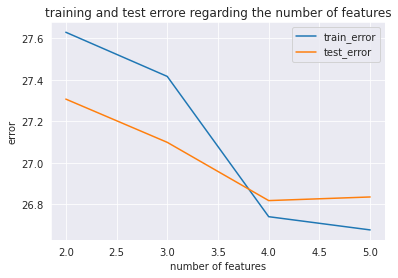

In [27]:
#Your code here: model prediction by  adding features sequentially
train_err = []
test_err =[]

for nbr_col in range(2,6):
  X_temp = X[X.columns[:nbr_col]]
  X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size = 0.2, random_state= 3, shuffle = True)

  scaler = MinMaxScaler()

  X_train = scaler.fit_transform(X_train)
  X_test = scaler.fit_transform(X_test)

  LR = LinearRegression(fit_intercept = True)

  LR.fit(X_train, y_train)

  train_err.append(mean_absolute_error(y_train, LR.predict(X_train)))
  test_err.append(mean_absolute_error(y_test, LR.predict(X_test)))

print("train error :", train_err)
print("test error ", test_err)

plt.title("training and test errore regarding the number of features")
plt.plot(range(2,6), train_err, label="train_error")
plt.plot(range(2,6), test_err, label="test_error")
plt.legend(fontsize=10)
plt.xlabel("number of features")
plt.ylabel("error")
plt.show()


**Question 11:**  
Which model the smallest absolute difference between train and test MAE (across all the models that you tried) ?

In [44]:
#Your code here:
list=[]
min= 1000
for i in range(0, len(train_err)): 
  x = train_err[i] - test_err[i]
  list.append(abs(x))

for x in range(0,len(list)) : 
  if min > list[x] :
    min = list[x]
    print("model:", x+1, "value", round(list[x],4))

model: 1 value 0.3223
model: 2 value 0.3178
model: 3 value 0.0776


**Question 12:**  
Which of the models have the highest test error (across all the models that you tried) ?

In [45]:
#Your code here:
max = 0
for x in range(0, len(list)) :
  if max < list[x] :
    max = list[x]
    print('model:', x+1, "value", round(list[x],4))

model: 1 value 0.3223


### Cross Validation feature regression

**Task 2.3:**  
Apply a one hot encoding over the columns:`race`, `education` and `maritl` (using the function `get_dummies()`).  
 
Consider all columns of the new wages dataframe (except `wage` and `logwage` which are the targets) as model features. Implement a cross validation procedure, save the scores of the different folds in an array.

**Hint:**  
- Use `get_dummies()` function from pandas
- Use `KFold()` module from sklearn with **3 splits**
- Create your linear model by fitting the intercept  weight over the training dataset (set the parameter to `True`)
- Use the R^2 score, the MAE and the MSE on your test set to compare your 3 models (you should display these values)
- Apply normalization (`MinMaxScaler`sklearn module).

In [30]:
#Your code here: one hot encoding
wages_encoded = pd.get_dummies(wages.maritl)
wages = pd.concat([wages, wages_encoded], axis=1)
wages_encoded = pd.get_dummies(wages.education)
wages = pd.concat([wages, wages_encoded], axis=1)
wages.head()

,year,age,maritl,race,education,jobclass,health,health_ins,logwage,wage,Divorced,Married,Never Married,Separated,Widowed,< HS Grad,Advanced Degree,College Grad,HS Grad,Some College
0,2006,18,Never Married,White,< HS Grad,0,0,0,4.318063,75.043154,0,0,1,0,0,1,0,0,0,0
1,2004,24,Never Married,White,College Grad,1,1,0,4.255273,70.476020,0,0,1,0,0,0,0,1,0,0
2,2003,45,Married,White,Some College,0,0,1,4.875061,130.982177,0,1,0,0,0,0,0,0,0,1
3,2003,43,Married,Asian,College Grad,1,1,1,5.041393,154.685293,0,1,0,0,0,0,0,1,0,0
4,2005,50,Divorced,White,HS Grad,1,0,1,4.318063,75.043154,1,0,0,0,0,0,0,0,1,0


In [0]:
targets = ['wage', 'logwage']
features = [x for x in wages.columns.tolist() if x not in targets]

In [32]:
#Your code here: cross validation with KFolds over 3 splits

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

kf= KFold(n_splits=3)
kf.get_n_splits('x')
print(kf)
KFold(n_splits=3, random_state=3, shuffle= True)

KFold(n_splits=3, random_state=None, shuffle=False)


KFold(n_splits=3, random_state=3, shuffle=True)

**Question 13:**  
What is the mean (average) value of the R^2 scores across all folds (rounding to two decimals place, e.g: 1.11) ?


In [0]:
#Your code here:

## Part 3 : Classification

For this part we will use the Titanic dataset. Load the dataset in a pandas dataframe

In [34]:
#data link
#'https://raw.githubusercontent.com/ahmadajal/DM_ML_course_public/master/5.%20Classification/in-classExercise/data/titanic_train-clean.csv'
link = 'https://raw.githubusercontent.com/ahmadajal/DM_ML_course_public/master/5.%20Classification/in-classExercise/data/titanic_train-clean.csv'
titanic = pd.read_csv(link)
titanic.head()

,PassengerId,Age,Embarked,Fare,Pclass,Sex,Survived,Title,FSize
0,1,22.0,2,7.2500,3,1,0.0,12,1
1,2,38.0,0,71.2833,1,0,1.0,13,1
2,3,26.0,2,7.9250,3,0,1.0,9,0
3,4,35.0,2,53.1000,1,0,1.0,13,1
4,5,35.0,2,8.0500,3,1,0.0,12,0


The goal of the exercise will be to classify if a passenger has survived (survived = 1) given some features. Let's use *Age, Embarked, Fare, Pclass, Sex* as features and *Survived* as target. 
Your first task is to cast the survived column to *Integer* and to define your dataframe of features (X) and your dataframe of target (y)

In [0]:
# cast column Survived to int
titanic['Survived'].astype('int')
X = titanic [['Age', 'Embarked', 'Fare', 'Pclass', 'Sex']]
y = titanic ['Survived']

Let's create a train and a test set with sklearn method *train_test_split*. We are going to use 80% for training and 20% for testing

**IMPORTANT POINT** : *train_test_split* randomizes the data. In order to have the same results as those expected we need to control this randomization by giving a value for the **random_state** attribute of this method. Here use **random_state = 0** or your results will be different from ours and you won't get points

In [0]:
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

We are going to use the Logistic Regression for our classification, without adding any parameters. You can train the model on train set

In [37]:
# create logistic regression (don't put any parameters) and create the model using the training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Remember, logistic regression tries to find a vector $\vec w$ with the same dimension as we have features (here 5) and a number $b$, the intercept

**Question 14 :** Find the fourth component of the vector w (the one corresponding to Pclass), round it to the second decimal (exemple : -6.06) <br>
**Hint :** Arrays indices start at 0

In [38]:
# print the proper coefficient of the model
round(model.coef_.flatten()[3],2)

-1.06

**Question 15 :** Find b, the intercept. Round it to the second decimal (exemple : -6.06)

In [39]:
# print the intercept of the model
round(model.intercept_[0],2)

4.85

**Question 16** : If a 42 years old man (sex = 0), embarked in city with id 0, paid his fare 17.9250 in Pclass 2, what is his probability to survive (i.e to belong to class 1). Round it to the 2nd digit (i.e. 0.12)

In [40]:
# print probability to survive for this person
a = model.predict_proba([[42.0,0,17.9250,2,0]])
a_list = [num for elem in a for num in elem]
round(a_list[1],2)

0.77

**Question 17**: Compute the confusion matrix using the test data. Are there more survivors classified as dead or more dead people classified as survivors?

In [41]:
# use confusion matrix to answer this question using the test data
from sklearn.metrics import confusion_matrix
b = confusion_matrix(y_test, model.predict(X_test))
print("more dead people classified as survivors",b)

more dead people classified as survivors [[91 19]
 [17 52]]


Now let's train a Classifier using KNN algorithm

**Question 18** : What is the optimal number of neighbors for the KNN algorithm, i.e. the minimal number of neighbors that maximizes the classification accuracy on the test set?  <br>
**hint1** : The optimal number is in $[1:50]$ <br>
**hint2** : You need to train a model for all 50 possible number of neighbors and for each compute the score of the model on the test set. Keep track of the best model at each iteration and its score

In [42]:
# your code here
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = list(range(1, 51))
for n in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    print("accuracy for k = " + str(n) + ", score: "  + str(model.score(X_test, y_test)))
    print("optimal number : k = 15")

accuracy for k = 1, score: 0.6815642458100558
optimal number : k = 15
accuracy for k = 2, score: 0.6703910614525139
optimal number : k = 15
accuracy for k = 3, score: 0.6927374301675978
optimal number : k = 15
accuracy for k = 4, score: 0.6871508379888268
optimal number : k = 15
accuracy for k = 5, score: 0.7150837988826816
optimal number : k = 15
accuracy for k = 6, score: 0.7094972067039106
optimal number : k = 15
accuracy for k = 7, score: 0.7374301675977654
optimal number : k = 15
accuracy for k = 8, score: 0.6983240223463687
optimal number : k = 15
accuracy for k = 9, score: 0.7430167597765364
optimal number : k = 15
accuracy for k = 10, score: 0.7374301675977654
optimal number : k = 15
accuracy for k = 11, score: 0.7318435754189944
optimal number : k = 15
accuracy for k = 12, score: 0.7206703910614525
optimal number : k = 15
accuracy for k = 13, score: 0.7318435754189944
optimal number : k = 15
accuracy for k = 14, score: 0.7486033519553073
optimal number : k = 15
accuracy for k 

Now let's try a Decision Tree classifier

**Question 19** : What is the value of maxi_depth for the decision Tree algorithm that maximizes the classification accuracy?<br>
**hint1** : The optimal number is in $[1:10]$ <br>**Indication** : For the classifier, use *random_sate* = 0

In [43]:
# your code here
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
depth = 5
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
while accuracy == 1:
    depth -= 1
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
print(depth+1)
print("The value of maxi_depth for the decision Tree algorithm that maximizes the classification accuracy is: 6")

0.7877094972067039
6
The value of maxi_depth for the decision Tree algorithm that maximizes the classification accuracy is: 6
